<a href="https://colab.research.google.com/github/shreyabhandarii/Credit-Line-Classification/blob/master/Amex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [8]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
id=pd.read_excel('/content/gdrive/My Drive/data/Amex/Data_Dictionary.xlsx')

In [0]:
id.head(2)

In [0]:
# names=id['Unnamed: 0']+id['Variable Name']
id['names']=id['Unnamed: 0'].str.cat(id['Variable Name'] , sep='-')

In [0]:
id['names']

In [176]:
# names=list(id['Variable Name'])

names=list(id['names'])[0:21]
names1=list(id['names'])[0:20]
print(names)
print(names1)

['VAR1-ID', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR', 'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit', 'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve', 'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance', 'VAR12-Months in Business', 'VAR13-preferred_spend_line', 'VAR14-total_cards', 'VAR15-preferred_bal_line', 'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate', 'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV', 'VAR21-Assigned Line']
['VAR1-ID', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR', 'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit', 'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve', 'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance', 'VAR12-Months in Business', 'VAR13-preferred_spend_line', 'VAR14-total_cards', 'VAR15-preferred_bal_line', 'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate', 'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV']


In [0]:
train=pd.read_csv('/content/gdrive/My Drive/data/Amex/development_dataset.csv', names=names, skiprows=1)

In [0]:
lead=pd.read_csv('/content/gdrive/My Drive/data/Amex/leaderboard_dataset.csv', names=names1, skiprows=1 )

In [131]:
lead.head(3)

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR14-total_cards,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV,VAR21-Assigned Line
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,NaN,58.632548,9.433609,40.033361,10.000000,2,10.0,1.212784,1000.00,1,0,48.099828,NaN
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,NaN,5.666667,1,7.6,1.004907,992.55,0,0,104.018933,NaN
2,3,955.294118,0.055556,NaN,611.574748,6.363636,0.918652,197.660051,22.086661,NaN,0.583494,NaN,6.000000,1,6.0,1.157115,NaN,1,1,120.586919,NaN


In [0]:
predict=pd.read_csv('/content/gdrive/My Drive/data/Amex/Evaluation_dataset.csv', names=names1, skiprows=1)

In [100]:
train.head()

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR14-total_cards,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV,VAR21-Assigned Line
0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
1,1,828.2352941,0.138888889,321.4285714,625.9110063,1.818181818,1.081550023,198.1134691,NaN,58.63254762,0.279273086,100.0834028,1,1,1,1.540593983,NaN,1,0,100.1049914,Low
2,2,911.7647059,0.027777778,NaN,611.5747476,8.181818182,1.344478804,198.6000199,22.08666116,NaN,NaN,15.01251043,NaN,1,NaN,1.614613197,NaN,0,1,146.6540448,High
3,3,962.3529412,0.833333333,35.71428571,615.8253809,8.181818182,0.720795853,197.267767,NaN,58.63254762,0.453212403,210.175146,10,1,10,1.044598924,NaN,0,0,98.24956971,Medium
4,4,892.9411765,NaN,NaN,638.0764309,9.090909091,0.82021807,197.3557437,4.363431026,58.63254762,NaN,NaN,NaN,1,NaN,1.145729215,NaN,1,0,140.8623064,Low


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1-ID                         34000 non-null int64
VAR2-FICO                       33039 non-null float64
VAR3-Business Revenue           30615 non-null float64
VAR4-TSR                        21506 non-null float64
VAR5-Last 6M Avg Util           33999 non-null float64
VAR6-Income                     30505 non-null float64
VAR7-Last 6M Avg Remit          33165 non-null float64
VAR8-Last 6M Avg Bal            33165 non-null float64
VAR9-Internal Revolve           18183 non-null float64
VAR10-Lending AR% in last 6M    29450 non-null float64
VAR11-ExternalBalance           26435 non-null float64
VAR12-Months in Business        23498 non-null float64
VAR13-preferred_spend_line      25478 non-null float64
VAR14-total_cards               34000 non-null object
VAR15-preferred_bal_line        25976 non-null float64
VAR16-preavgremit1_3_all        33134 non-null float64
VAR17-External

In [23]:
train.describe()

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [0]:
from scipy.stats import mode


In [0]:
mode(train)

In [25]:
any(train['VAR1-ID'].duplicated())

False

In [26]:
train.isnull().sum().sort_values(ascending=False) #amount of NaNs per column

VAR17-External_rev_rate         22194
VAR9-Internal Revolve           15817
VAR4-TSR                        12494
VAR12-Months in Business        10502
VAR13-preferred_spend_line       8522
VAR15-preferred_bal_line         8024
VAR11-ExternalBalance            7565
VAR10-Lending AR% in last 6M     4550
VAR6-Income                      3495
VAR3-Business Revenue            3385
VAR2-FICO                         961
VAR16-preavgremit1_3_all          866
VAR8-Last 6M Avg Bal              835
VAR7-Last 6M Avg Remit            835
VAR5-Last 6M Avg Util               1
VAR21-Assigned Line                 0
VAR20-CMV                           0
VAR14-total_cards                   0
VAR18-Supplementary Cards           0
VAR19-isChargeCust                  0
VAR1-ID                             0
dtype: int64

In [27]:
train.isnull().mean().round(4).sort_values(ascending=False) * 100 #amount of NaNs per column

VAR17-External_rev_rate         65.28
VAR9-Internal Revolve           46.52
VAR4-TSR                        36.75
VAR12-Months in Business        30.89
VAR13-preferred_spend_line      25.06
VAR15-preferred_bal_line        23.60
VAR11-ExternalBalance           22.25
VAR10-Lending AR% in last 6M    13.38
VAR6-Income                     10.28
VAR3-Business Revenue            9.96
VAR2-FICO                        2.83
VAR16-preavgremit1_3_all         2.55
VAR8-Last 6M Avg Bal             2.46
VAR7-Last 6M Avg Remit           2.46
VAR5-Last 6M Avg Util            0.00
VAR21-Assigned Line              0.00
VAR20-CMV                        0.00
VAR14-total_cards                0.00
VAR18-Supplementary Cards        0.00
VAR19-isChargeCust               0.00
VAR1-ID                          0.00
dtype: float64

In [28]:
train.isnull().sum(axis=1).value_counts()#sum number of NaNs per row and then calculate number of rows with no NaNs, 1 NaN, 2 NaNs and so on

2     8404
1     7125
3     5747
4     3003
5     2882
6     2429
0     2059
7     1378
8      649
9      225
10      77
11      21
12       1
dtype: int64

In [0]:
import missingno as msno 

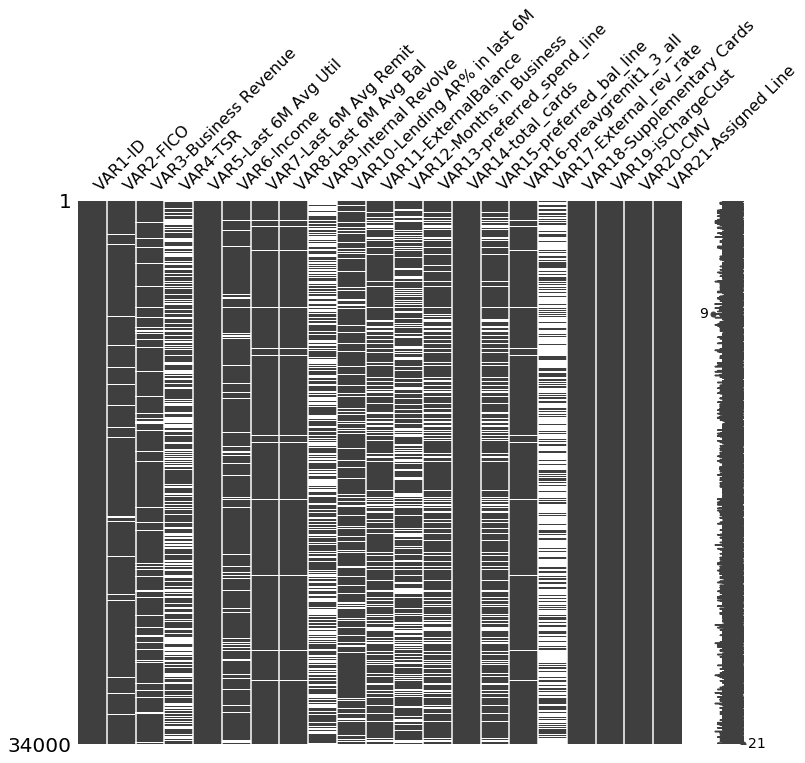

In [30]:
msno.matrix(train, figsize=(12,10));

Using this matrix you can very quickly find the pattern of missingness in the dataset. In our example, the columns V8 and V7 have a similar pattern of missing values while V17 shows a different pattern.

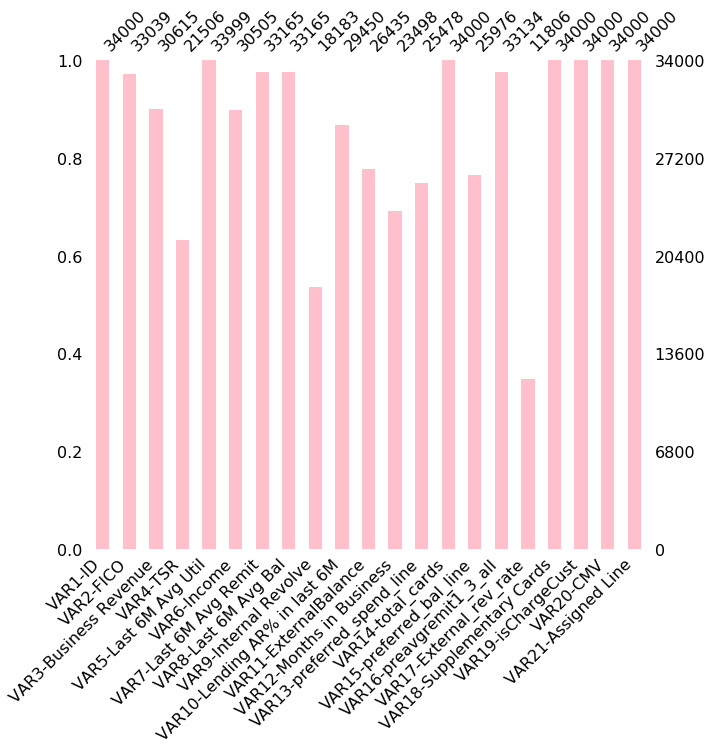

In [34]:
msno.bar(train, figsize=(10,9), color ='pink')

This bar chart gives you an idea about how many missing values are there in each column. In our example, V17 and V9 contain the most number of missing values followed by UCZAA.

In [0]:
import matplotlib.pyplot as plt

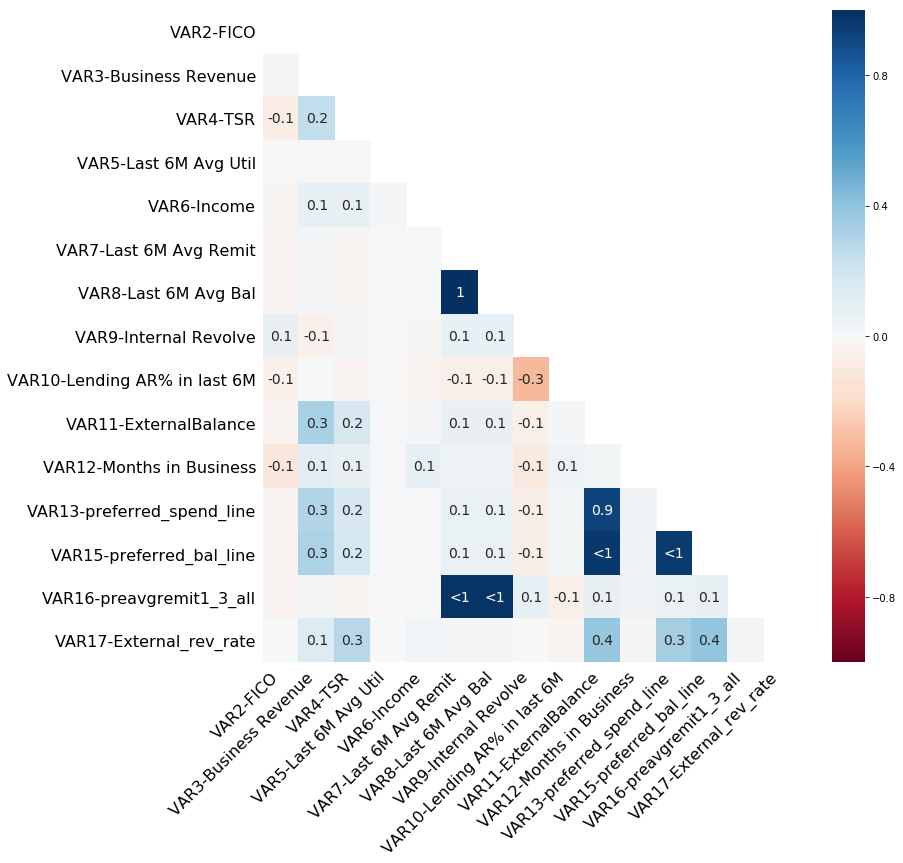

In [38]:
msno.heatmap(train, figsize=(12,12), cmap = plt.cm.RdBu);

Heatmap shows the correlation of missingness between every 2 columns. In our example, the correlation between V8 and V7 is 1 which means if one of them is present then the other one must be present.

A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.

In [0]:
# df.loc[:, ['col1', 'col2']].isnull().sum(axis=1).value_counts()#no. of NaNs in rows but in specific columns only

In [0]:
#train['VAR21-Assigned Line'].hist()

In [22]:
train['VAR21-Assigned Line'].value_counts()

Medium    18172
Low       12081
High       3747
Name: VAR21-Assigned Line, dtype: int64

In [0]:
hi=train.groupby('VAR21-Assigned Line').size()/len(train)*100

In [42]:
hid=pd.DataFrame(hi)
print(hid)

                             0
VAR21-Assigned Line           
High                 11.020588
Low                  35.532353
Medium               53.447059


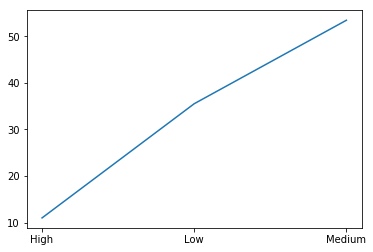

In [43]:
plt.plot(hid);

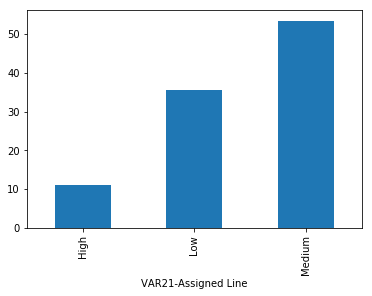

In [44]:
hid.plot(kind='bar', legend=False);

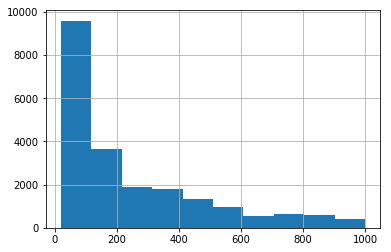

In [45]:
train['VAR4-TSR'].hist();

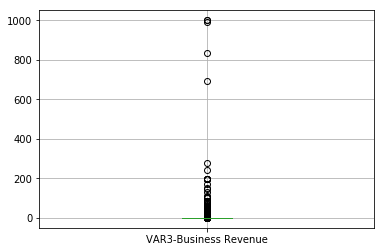

In [49]:
train.boxplot(column='VAR3-Business Revenue');

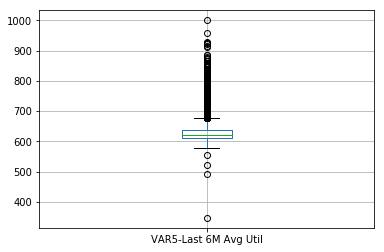

In [50]:
train.boxplot(column='VAR5-Last 6M Avg Util');

In [0]:
import seaborn as sns

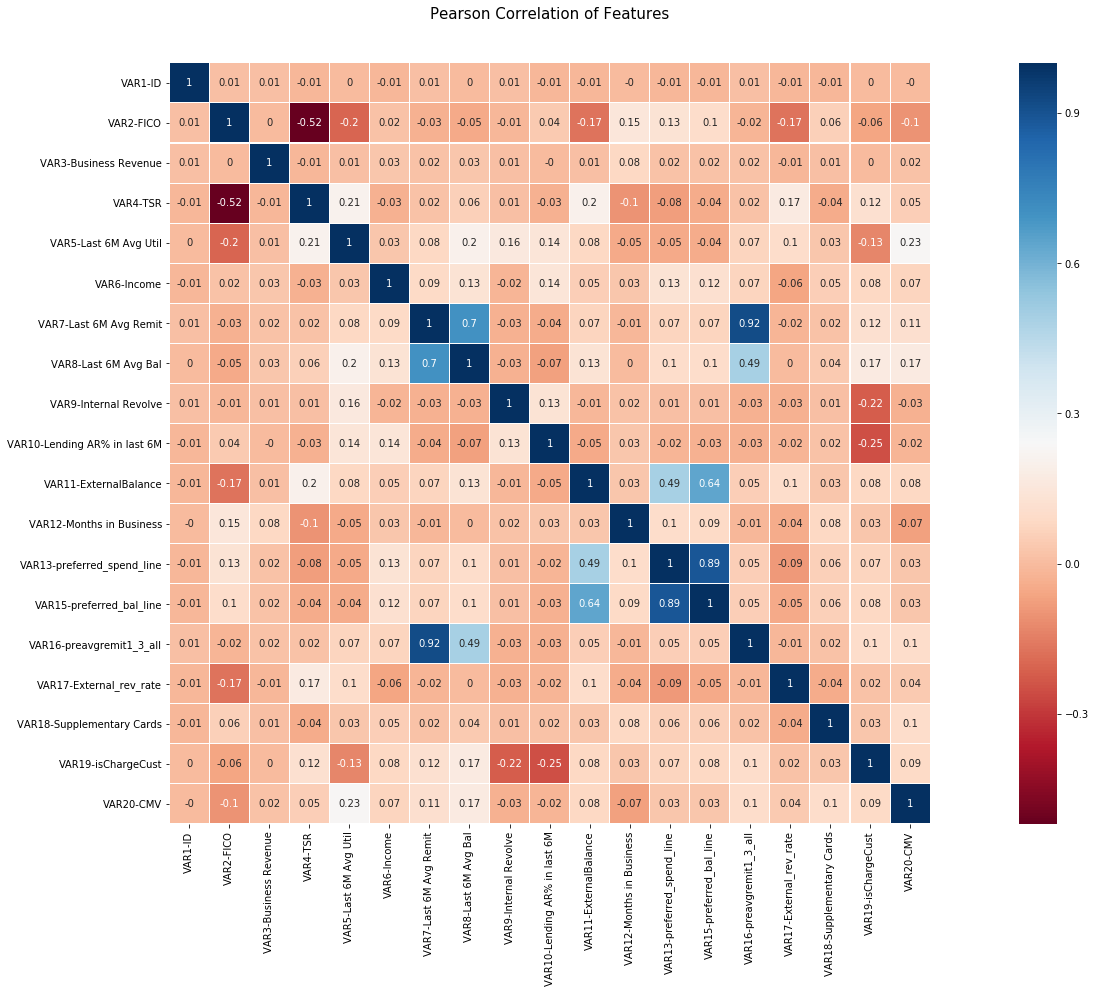

In [53]:
colormap = plt.cm.RdBu
data=train.corr().round(2)
plt.figure(figsize=(32,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [48]:
train.columns

Index(['VAR1-ID', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR',
       'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit',
       'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve',
       'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance',
       'VAR12-Months in Business', 'VAR13-preferred_spend_line',
       'VAR14-total_cards', 'VAR15-preferred_bal_line',
       'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate',
       'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV',
       'VAR21-Assigned Line'],
      dtype='object')

In [58]:
train['VAR21-Assigned Line'].dtypes

dtype('O')

In [0]:
Train=train.copy()

In [0]:
Train["VAR21-Assigned Line"] = train["VAR21-Assigned Line"].astype('category')

In [0]:
Train["VAR21-Assigned Line"] = Train["VAR21-Assigned Line"].cat.codes

In [139]:
Train["VAR21-Assigned Line"].value_counts()

2    18172
1    12081
0     3747
Name: VAR21-Assigned Line, dtype: int64

In [0]:
Y=Train["VAR21-Assigned Line"]

In [0]:
# Train.drop(columns='VAR14-total_cards',inplace=True, axis=1)

In [0]:
Train.replace({'VAR14-total_cards': {'.': 1}}, inplace=True)

In [142]:
from fancyimpute import KNN 
#fancy impute removes column names.
train_cols = list(Train)

# Use 5 nearest rows which have a feature to fill in each row's missing features
train1 = pd.DataFrame(KNN(k=5).fit_transform(Train))
train1.columns = train_cols

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


Imputing row 1/34000 with 2 missing, elapsed time: 322.369
Imputing row 101/34000 with 1 missing, elapsed time: 322.452
Imputing row 201/34000 with 2 missing, elapsed time: 322.538
Imputing row 301/34000 with 2 missing, elapsed time: 322.622
Imputing row 401/34000 with 6 missing, elapsed time: 322.705
Imputing row 501/34000 with 2 missing, elapsed time: 322.792
Imputing row 601/34000 with 3 missing, elapsed time: 322.872
Imputing row 701/34000 with 3 missing, elapsed time: 322.957
Imputing row 801/34000 with 2 missing, elapsed time: 323.048
Imputing row 901/34000 with 0 missing, elapsed time: 323.127
Imputing row 1001/34000 with 1 missing, elapsed time: 323.211
Imputing row 1101/34000 with 2 missing, elapsed time: 323.288
Imputing row 1201/34000 with 2 missing, elapsed time: 323.380
Imputing row 1301/34000 with 4 missing, elapsed time: 323.457
Imputing row 1401/34000 with 4 missing, elapsed time: 323.535
Imputing row 1501/34000 with 4 missing, elapsed time: 323.616
Imputing row 1601/34

In [0]:
# train1['VAR14-total_cards']=train['VAR14-total_cards']

In [0]:
train1.to_csv('/content/gdrive/My Drive/data/Amex/imputedfile.csv')


In [0]:
train1=pd.read_csv('/content/gdrive/My Drive/data/Amex/imputedfile.csv')

In [0]:
# list(Train)

In [21]:
train1.isnull().sum()

Unnamed: 0    0
VAR1          0
VAR2          0
VAR3          0
VAR4          0
VAR5          0
VAR6          0
VAR7          0
VAR8          0
VAR9          0
VAR10         0
VAR11         0
VAR12         0
VAR13         0
VAR15         0
VAR16         0
VAR17         0
VAR18         0
VAR19         0
VAR20         0
VAR21         0
VAR14         0
dtype: int64

In [0]:
# import rpy2.robjects as ro

In [0]:
# python setup.py install

In [0]:
# pip install rpy2==2.3.0

In [0]:
# pip install rpy

In [0]:

# This sets the correct stable version. I had a few difficulties with version above 2.3.0 but those might be fixed in the future

# Ok to begin we need to import all the necessary libraries.

# import scipy as sp

# from rpy2.robjects.packages import importr

# import pandas.rpy.common as com

In [145]:
pip install mord

In [0]:
import mord


In [0]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT

In [0]:
from statsmodels.api import add_constant

In [0]:
import statsmodels.api as sm

In [42]:
train1.columns

Index(['Unnamed: 0', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7',
       'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16',
       'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR14'],
      dtype='object')

In [150]:
train1.head()

,Unnamed: 0,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR14-total_cards,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV,VAR21-Assigned Line
0,0,1.0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,21.062509,58.632548,0.279273,100.083403,1.000000,1.0,1.000000,1.540594,912.313476,1.0,0.0,100.104991,1.0
1,1,2.0,911.764706,0.027778,214.067101,611.574748,8.181818,1.344479,198.600020,22.086661,53.254392,6.721240,15.012510,10.541259,1.0,13.173979,1.614613,847.825547,0.0,1.0,146.654045,0.0
2,2,3.0,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,71.172496,58.632548,0.453212,210.175146,10.000000,1.0,10.000000,1.044599,790.199971,0.0,0.0,98.249570,2.0
3,3,4.0,892.941177,0.088780,243.948299,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.528021,105.420120,12.106913,1.0,14.100605,1.145729,815.131815,1.0,0.0,140.862306,1.0
4,4,5.0,914.117647,0.083333,227.938914,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,4.621252,210.175146,6.894426,1.0,9.191711,1.558341,888.154353,1.0,0.0,101.268503,0.0


In [0]:
train1.drop('VAR21-Assigned Line', axis=1, inplace=True)

In [0]:
train1.drop(['Unnamed: 0', 'VAR1-ID'],axis=1, inplace=True)

In [197]:
train1.columns

Index(['const', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR',
       'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit',
       'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve',
       'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance',
       'VAR12-Months in Business', 'VAR13-preferred_spend_line',
       'VAR14-total_cards', 'VAR15-preferred_bal_line',
       'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate',
       'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV'],
      dtype='object')

In [0]:
predict.replace({'VAR14-total_cards': {'.': 1}}, inplace=True)

In [45]:
Y.head(2)

0    1
1    0
Name: VAR21-Assigned Line, dtype: int8

In [0]:
Y = Y.astype('int')

In [0]:
# train1['VAR14-total_cards'].astype('array')

In [38]:
Y.dtype

dtype('int64')

In [76]:
train1.dtypes

const    float64
VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR15    float64
VAR16    float64
VAR17    float64
VAR18    float64
VAR19    float64
VAR20    float64
dtype: object

In [0]:
# train1.drop('VAR14', inplace=True, axis=1)

In [0]:
import numpy as np



In [0]:

# np.asarray(train1)

In [155]:
train1.shape

(34000, 20)

In [0]:
train1.head()

In [156]:
train1=add_constant(train1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [198]:
lead1=add_constant(lead1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
lpm_model = sm.OLS(Y, train1)
lpm_result = lpm_model.fit()
print('Parameters: ', lpm_result.params[:-1])

Parameters:  const    1.280104
VAR2     0.000932
VAR3     0.000096
VAR4    -0.000045
VAR5    -0.000753
VAR6     0.000219
VAR7     0.000693
VAR8    -0.001231
VAR9    -0.000089
VAR10   -0.000085
VAR11   -0.001158
VAR12    0.000106
VAR13   -0.000523
VAR15    0.000969
VAR16   -0.001429
VAR17    0.000041
VAR18    0.003266
VAR19   -0.066063
dtype: float64


In [78]:
lpm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     VAR21-Assigned Line   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     24.69
Date:                 Tue, 01 Oct 2019   Prob (F-statistic):           1.82e-82
Time:                         07:41:55   Log-Likelihood:                -34994.
No. Observations:                34000   AIC:                         7.003e+04
Df Residuals:                    33981   BIC:                         7.019e+04
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2801      0.156      8.194      0.000       0.974       1.586
VAR2           0.0009   9.02e-05     10.343      0.000       0.001       0.001
VAR3        9.622e-05      0.000      0.324      0.746      -0.000       0.001
VAR4       -4.472e-05   2.19e-05     -2.044      0.041   -8.76e-05   -1.85e-06
VAR5          -0.0008      0.000     -5.607      0.000      -0.001      -0.000
VAR6           0.0002      0.000      1.627      0.104   -4.47e-05       0.000
VAR7           0.0007      0.002      0.420      0.675      -0.003       0.004
VAR8          -0.0012      0.001     -2.057      0.040      -0.002   -5.81e-05
VAR9       -8.888e-05   5.54e-05     -1.606      0.108      -0.000    1.96e-05
VAR10      -8.524e-05      0.001     -0.142      0.887      -0.001       0.001
VAR11         -0.0012      0.001     -2.305      0.021      -0.002      -0.000
VAR12          0.0001   3.54e-05      2.995      0.003    3.66e-05       0.000
VAR13         -0.0005      0.001     -0.689      0.491      -0.002       0.001
VAR15          0.0010      0.001      1.227      0.220      -0.001       0.003
VAR16         -0.0014      0.001     -0.953      0.340      -0.004       0.002
VAR17        4.14e-05   1.95e-05      2.128      0.033    3.28e-06    7.95e-05
VAR18          0.0033      0.005      0.602      0.547      -0.007       0.014
VAR19         -0.0661      0.009     -7.620      0.000      -0.083      -0.049
VAR20       2.311e-06   3.15e-05      0.073      0.941   -5.94e-05     6.4e-05
==============================================================================
Omnibus:                     3372.465   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3817.144
Skew:                          -0.783   Prob(JB):                         0.00
Kurtosis:                       2.506   Cond. No.                     6.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
model_linear = LinearRegression()

In [0]:
model_1vR = LogisticRegression(multi_class='ovr',
    class_weight='balanced')
model_multi = LogisticRegression(multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [161]:
MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    train1,
    Y,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR,
    train1,
    Y,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi,
    train1,
    Y,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    train1,
    Y,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.6050312087289691


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic regression (one versus rest):  0.548382363286625


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic regression (multinomial):  0.7156456952680503
Ordered logistic regression:  0.5477352941176471


In [0]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(train1) 

In [163]:
X_train.shape


(34000, 20)

In [0]:
 X_train

In [0]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 16) 

X_train = pca.fit_transform(X_train) 


explained_variance = pca.explained_variance_ratio_ 


In [165]:
explained_variance.shape

(16,)

In [0]:


principalDataframe = pd.DataFrame(data = X_train, columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

In [0]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

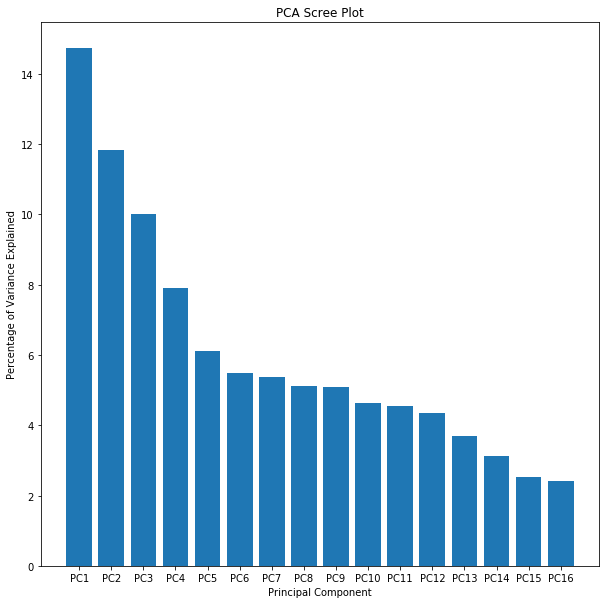

In [167]:
percent_variance = np.round(explained_variance* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']
plt.figure(figsize=(10,10))
plt.bar(x= range(1,17), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [0]:
# X_train==train

In [168]:
MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    X_train,
    Y,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR,
    X_train,
    Y,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi,
    X_train,
    Y,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    X_train,
    Y,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.6053597862838705


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic regression (one versus rest):  0.5482351919974425
Logistic regression (multinomial):  0.7214702022190461
Ordered logistic regression:  0.5480588235294117


In [169]:
model_1vR.fit(train1,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# lead.iloc[:,13]

In [0]:
# lead.iloc[173,13]=1

In [0]:
lead.replace({'VAR14-total_cards': {'.': 1}}, inplace=True)

In [123]:
# lead[lead.iloc[:,13]== '.']

,VAR1-ID,VAR2-FICO,VAR3-Business Revenue,VAR4-TSR,VAR5-Last 6M Avg Util,VAR6-Income,VAR7-Last 6M Avg Remit,VAR8-Last 6M Avg Bal,VAR9-Internal Revolve,VAR10-Lending AR% in last 6M,VAR11-ExternalBalance,VAR12-Months in Business,VAR13-preferred_spend_line,VAR14-total_cards,VAR15-preferred_bal_line,VAR16-preavgremit1_3_all,VAR17-External_rev_rate,VAR18-Supplementary Cards,VAR19-isChargeCust,VAR20-CMV,VAR21-Assigned Line


In [179]:
lead.columns

Index(['VAR1-ID', 'VAR2-FICO', 'VAR3-Business Revenue', 'VAR4-TSR',
       'VAR5-Last 6M Avg Util', 'VAR6-Income', 'VAR7-Last 6M Avg Remit',
       'VAR8-Last 6M Avg Bal', 'VAR9-Internal Revolve',
       'VAR10-Lending AR% in last 6M', 'VAR11-ExternalBalance',
       'VAR12-Months in Business', 'VAR13-preferred_spend_line',
       'VAR14-total_cards', 'VAR15-preferred_bal_line',
       'VAR16-preavgremit1_3_all', 'VAR17-External_rev_rate',
       'VAR18-Supplementary Cards', 'VAR19-isChargeCust', 'VAR20-CMV'],
      dtype='object')

In [182]:
lead_cols = list(lead)

# Use 5 nearest rows which have a feature to fill in each row's missing features
lead1 = pd.DataFrame(KNN(k=5).fit_transform(lead))
lead1.columns = lead_cols

Imputing row 1/10000 with 1 missing, elapsed time: 22.802
Imputing row 101/10000 with 1 missing, elapsed time: 22.828
Imputing row 201/10000 with 2 missing, elapsed time: 22.856
Imputing row 301/10000 with 3 missing, elapsed time: 22.884
Imputing row 401/10000 with 7 missing, elapsed time: 22.910
Imputing row 501/10000 with 4 missing, elapsed time: 22.937
Imputing row 601/10000 with 3 missing, elapsed time: 22.966
Imputing row 701/10000 with 1 missing, elapsed time: 22.993
Imputing row 801/10000 with 2 missing, elapsed time: 23.026
Imputing row 901/10000 with 2 missing, elapsed time: 23.054
Imputing row 1001/10000 with 3 missing, elapsed time: 23.082
Imputing row 1101/10000 with 3 missing, elapsed time: 23.107
Imputing row 1201/10000 with 3 missing, elapsed time: 23.136
Imputing row 1301/10000 with 1 missing, elapsed time: 23.163
Imputing row 1401/10000 with 2 missing, elapsed time: 23.191
Imputing row 1501/10000 with 2 missing, elapsed time: 23.221
Imputing row 1601/10000 with 0 missi

In [184]:
lead1.isnull().sum()

VAR1-ID                         0
VAR2-FICO                       0
VAR3-Business Revenue           0
VAR4-TSR                        0
VAR5-Last 6M Avg Util           0
VAR6-Income                     0
VAR7-Last 6M Avg Remit          0
VAR8-Last 6M Avg Bal            0
VAR9-Internal Revolve           0
VAR10-Lending AR% in last 6M    0
VAR11-ExternalBalance           0
VAR12-Months in Business        0
VAR13-preferred_spend_line      0
VAR14-total_cards               0
VAR15-preferred_bal_line        0
VAR16-preavgremit1_3_all        0
VAR17-External_rev_rate         0
VAR18-Supplementary Cards       0
VAR19-isChargeCust              0
VAR20-CMV                       0
dtype: int64

In [189]:
train1.shape

(34000, 20)

In [196]:
lead1.shape

(10000, 19)

In [195]:
lead1.max(axis=0)

VAR2-FICO                       1000.000000
VAR3-Business Revenue           1000.000000
VAR4-TSR                        1000.000000
VAR5-Last 6M Avg Util            957.849053
VAR6-Income                      909.090818
VAR7-Last 6M Avg Remit           224.722562
VAR8-Last 6M Avg Bal             475.687040
VAR9-Internal Revolve            931.742250
VAR10-Lending AR% in last 6M      93.177335
VAR11-ExternalBalance           1000.000000
VAR12-Months in Business         990.825688
VAR13-preferred_spend_line      1000.000000
VAR14-total_cards                 20.000000
VAR15-preferred_bal_line        1000.000000
VAR16-preavgremit1_3_all         187.777811
VAR17-External_rev_rate         1000.000098
VAR18-Supplementary Cards         23.000000
VAR19-isChargeCust                 1.000000
VAR20-CMV                       1000.000000
dtype: float64

In [0]:
lead1.drop('VAR1-ID', inplace=True, axis =1)

In [0]:
y_pred1 = model_1vR.predict(lead1) 


In [0]:
y_pred1

In [0]:
Pred_Logit=pd.DataFrame(y_pred1, columns=['Predn'])


In [0]:
print(Pred_Logit)

In [202]:
list(Pred_Logit)

['Predn']

In [203]:
model_ordinal.fit(train1,Y)

LogisticAT(alpha=0, max_iter=1000, verbose=0)

In [0]:
y_pred2 = model_ordinal.predict(lead1) 

In [99]:
y_pred2

array([1, 2, 2, ..., 2, 1, 2])

In [0]:
Pred_OLogit=pd.DataFrame(y_pred2, columns=['Predn'])

In [0]:
new_asn = {'Predn':     {2: 'Medium', 1: 'Low', 0: 'High'  }}

In [0]:
Pred_Logit.replace(new_asn, inplace=True)

In [0]:
Pred_OLogit.replace(new_asn, inplace=True)

In [217]:
Pred_Logit.head()

,Predn
0,1
1,1
2,2
3,1
4,2


In [0]:
Pred_Logit.to_csv('/content/gdrive/My Drive/data/Amex/Pred_Logit1va.csv')

In [0]:
Pred_OLogit.to_csv('/content/gdrive/My Drive/data/Amex/Pred_OLogit.csv')

In [0]:
# from sklearn.metrics import confusion_matrix 

# cm = confusion_matrix(Y,y_pred1) 
# cm

In [100]:
# cm2 = confusion_matrix(Y,y_pred2) 
# cm2

array([[    1,  1014,  2732],
       [    5,  3792,  8284],
       [    1,  3825, 14346]])

In [53]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, Y) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the test set result using 
# predict function under LogisticRegression 
# y_pred = classifier.predict(X_train) 


In [0]:
# making confusion matrix between 
# test set of Y and predicted value.  

# cm = confusion_matrix(Y,y_pred) 


In [59]:
# cm

array([[    1,   428,  3318],
       [    2,  2329,  9750],
       [    0,  1775, 16397]])